In [1]:
from eeg_net.eeg_resnet import * 
from eeg_net.eeg_net_base import *
from eeg_net.eeg_rnn import * 
from eeg_net.eeg_cnn import *
import numpy as np 
import matplotlib.pyplot as plt 
from torchsummary import summary
from eeg_net.solver import * 
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")
person_train_valid = np.load("data/person_train_valid.npy")
X_train_valid = np.load("data/X_train_valid.npy")
y_train_valid = np.load("data/y_train_valid.npy")
person_test = np.load("data/person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))
X_test_dir = './data/X_test.npy'
y_test_dir = './data/y_test.npy' 
X_train_valid_dir = './data/X_train_valid.npy' 
y_train_valid_dir = './data/y_train_valid.npy'
X_test_dsample_dir = './data/X_test_downsample.npy'
y_test_dsample_dir = './data/y_test_downsample.npy' 
X_train_valid_dsample_dir = './data/X_train_valid_downsample.npy' 
y_train_valid_dsample_dir = './data/y_train_valid_downsample.npy'
X_test_ds = np.load(X_test_dsample_dir)
y_test_ds = np.load(y_test_dsample_dir)
X_train_valid_ds = np.load(X_train_valid_dsample_dir)
y_train_valid_ds = np.load(y_train_valid_dsample_dir)

X_train_val_05_70_dir = './data/band_pass_data/X_train_val_05_70.npy'
X_train_val_01_70_dir = './data/band_pass_data/X_train_val_01_70.npy' 
X_train_val_05_70_ds_dir = './data/band_pass_data/X_train_val_downsample_05_70.npy'
X_train_val_01_70_ds_dir = './data/band_pass_data/X_train_val_downsample_01_70.npy' 
X_train_val_01_45_dir = './data/band_pass_data/X_train_val_01_45.npy'
X_train_val_01_45_ds_dir = './data/band_pass_data/X_train_val_downsample_01_45.npy' 

X_train_val_ds_norm_dir = './data/band_pass_data/X_test_downsample_norm.npy'
X_train_valid_ds_01_45_norm_dir= './data/band_pass_data/X_test_val_downsample_01_45_norm.npy'

X_train_valid_ds_fftmag_dir= './data/band_pass_data/X_test_val_downsample_fft_mag.npy'
X_train_valid_ds_fftphase_dir= './data/band_pass_data/X_test_val_downsample_fft_phase.npy'


X_train_val_05_70 = np.load(X_train_val_05_70_dir)
X_train_val_01_70 = np.load(X_train_val_01_70_dir) 
X_train_val_05_70_ds = np.load(X_train_val_05_70_ds_dir)
X_train_val_01_70_ds = np.load(X_train_val_01_70_ds_dir)


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [4]:
encoder_opt = {
    'conv1_size': 15,
    'conv1_out_channel': 22,
    'conv2_size': 15,
    'conv2_out_channel': 44,
    'conv3_size': 15,
    'conv3_out_channel': 22,
    'conv1_pool':2,
    'conv2_pool':2,
    'conv3_pool':2,
    'activation': 'none',
    'pool_type': 'max'   
}

decoder_opt = {
    'activation': 'none',
    'drop_rate' :0.9, 
    'linear1_out':80,
}
train_options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'scheduler_factor': 0.5,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 150,
}
model = EEGCNNv3(input_size=(1,22,1000),
                encoder_opt=encoder_opt,
                decoder_opt=decoder_opt).to('cuda')
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)

(1, 22, 1000)
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	3.383995
0	3.780149	0.283524	1.818241	0.352246	
--Iter 49	4.567337
1	3.860670	0.318733	1.894993	0.323877	
--Iter 49	3.000710
2	3.473065	0.348214	2.137209	0.347518	
--Iter 49	2.979062
3	3.254728	0.356385	1.770066	0.352246	
--Iter 49	4.537284
4	3.029883	0.384687	1.835410	0.382979	
--Iter 49	3.554321
5	3.013101	0.389656	2.136401	0.335697	
--Iter 49	2.329991
6	2.755895	0.392773	1.943426	0.347518	
--Iter 49	2.972507
7	2.720869	0.406671	1.860573	0.366430	
--Iter 49	1.965550
8	2.340220	0.444744	1.770790	0.368794	
--Iter 49	2.687138
9	2.152968	0.469087	1.745611	0.390071	
--Iter 49	1.500801
10	2.007819	0.496631	1.744693	0.387707	
--Iter 49	1.489909
11	1.878080	0.479279	1.795971	0.380615	
--Iter 49	2.468298
12	1.839215	0.487028	1.644355	0.378251	
--Iter 49	2.056504
13	1.622914	0.518531	1.805091	0.378251	
--Iter 49	1.394344
14	1.552717	0.519710	1.729973	0.444444	
--Iter 49	0.897397
15	1.531022	0.548012	1.6246

KeyboardInterrupt: 

398315
68	0.422303	0.929077	0.755563	0.738771	
--Iter 49	0.417874
69	0.423383	0.912273	0.737955	0.736407	
--Iter 49	0.377509
70	0.427094	0.918379	0.763285	0.724586	
--Iter 49	0.443869
71	0.416712	0.928108	0.727354	0.718676	
--Iter 49	0.440840
72	0.415441	0.929035	0.743879	0.711584	
--Iter 49	0.405725
73	0.412550	0.924697	0.764577	0.709220	
--Iter 49	0.432528
74	0.415023	0.925539	0.733727	0.743499	
--Iter 49	0.437895
75	0.425772	0.923349	0.737724	0.728132	
--Iter 49	0.339164
76	0.420071	0.928150	0.739458	0.722222	
--Iter 49	0.379159
77	0.418128	0.928740	0.771606	0.728132	
--Iter 49	0.446478
78	0.415407	0.925455	0.754697	0.711584	
--Iter 49	0.441078
79	0.409370	0.927013	0.747924	0.690307	
--Iter 49	0.454614
80	0.421458	0.926550	0.772970	0.726950	
--Iter 49	0.476890
81	0.415310	0.927855	0.757499	0.726950	
--Iter 49	0.400347
82	0.416092	0.929035	0.731627	0.724586	
--Iter 49	0.458023
83	0.413034	0.932236	0.736277	0.736407	
--Iter 49	0.412245
84	0.422332	0.931056	0.737254	0.709220	
--Iter 49

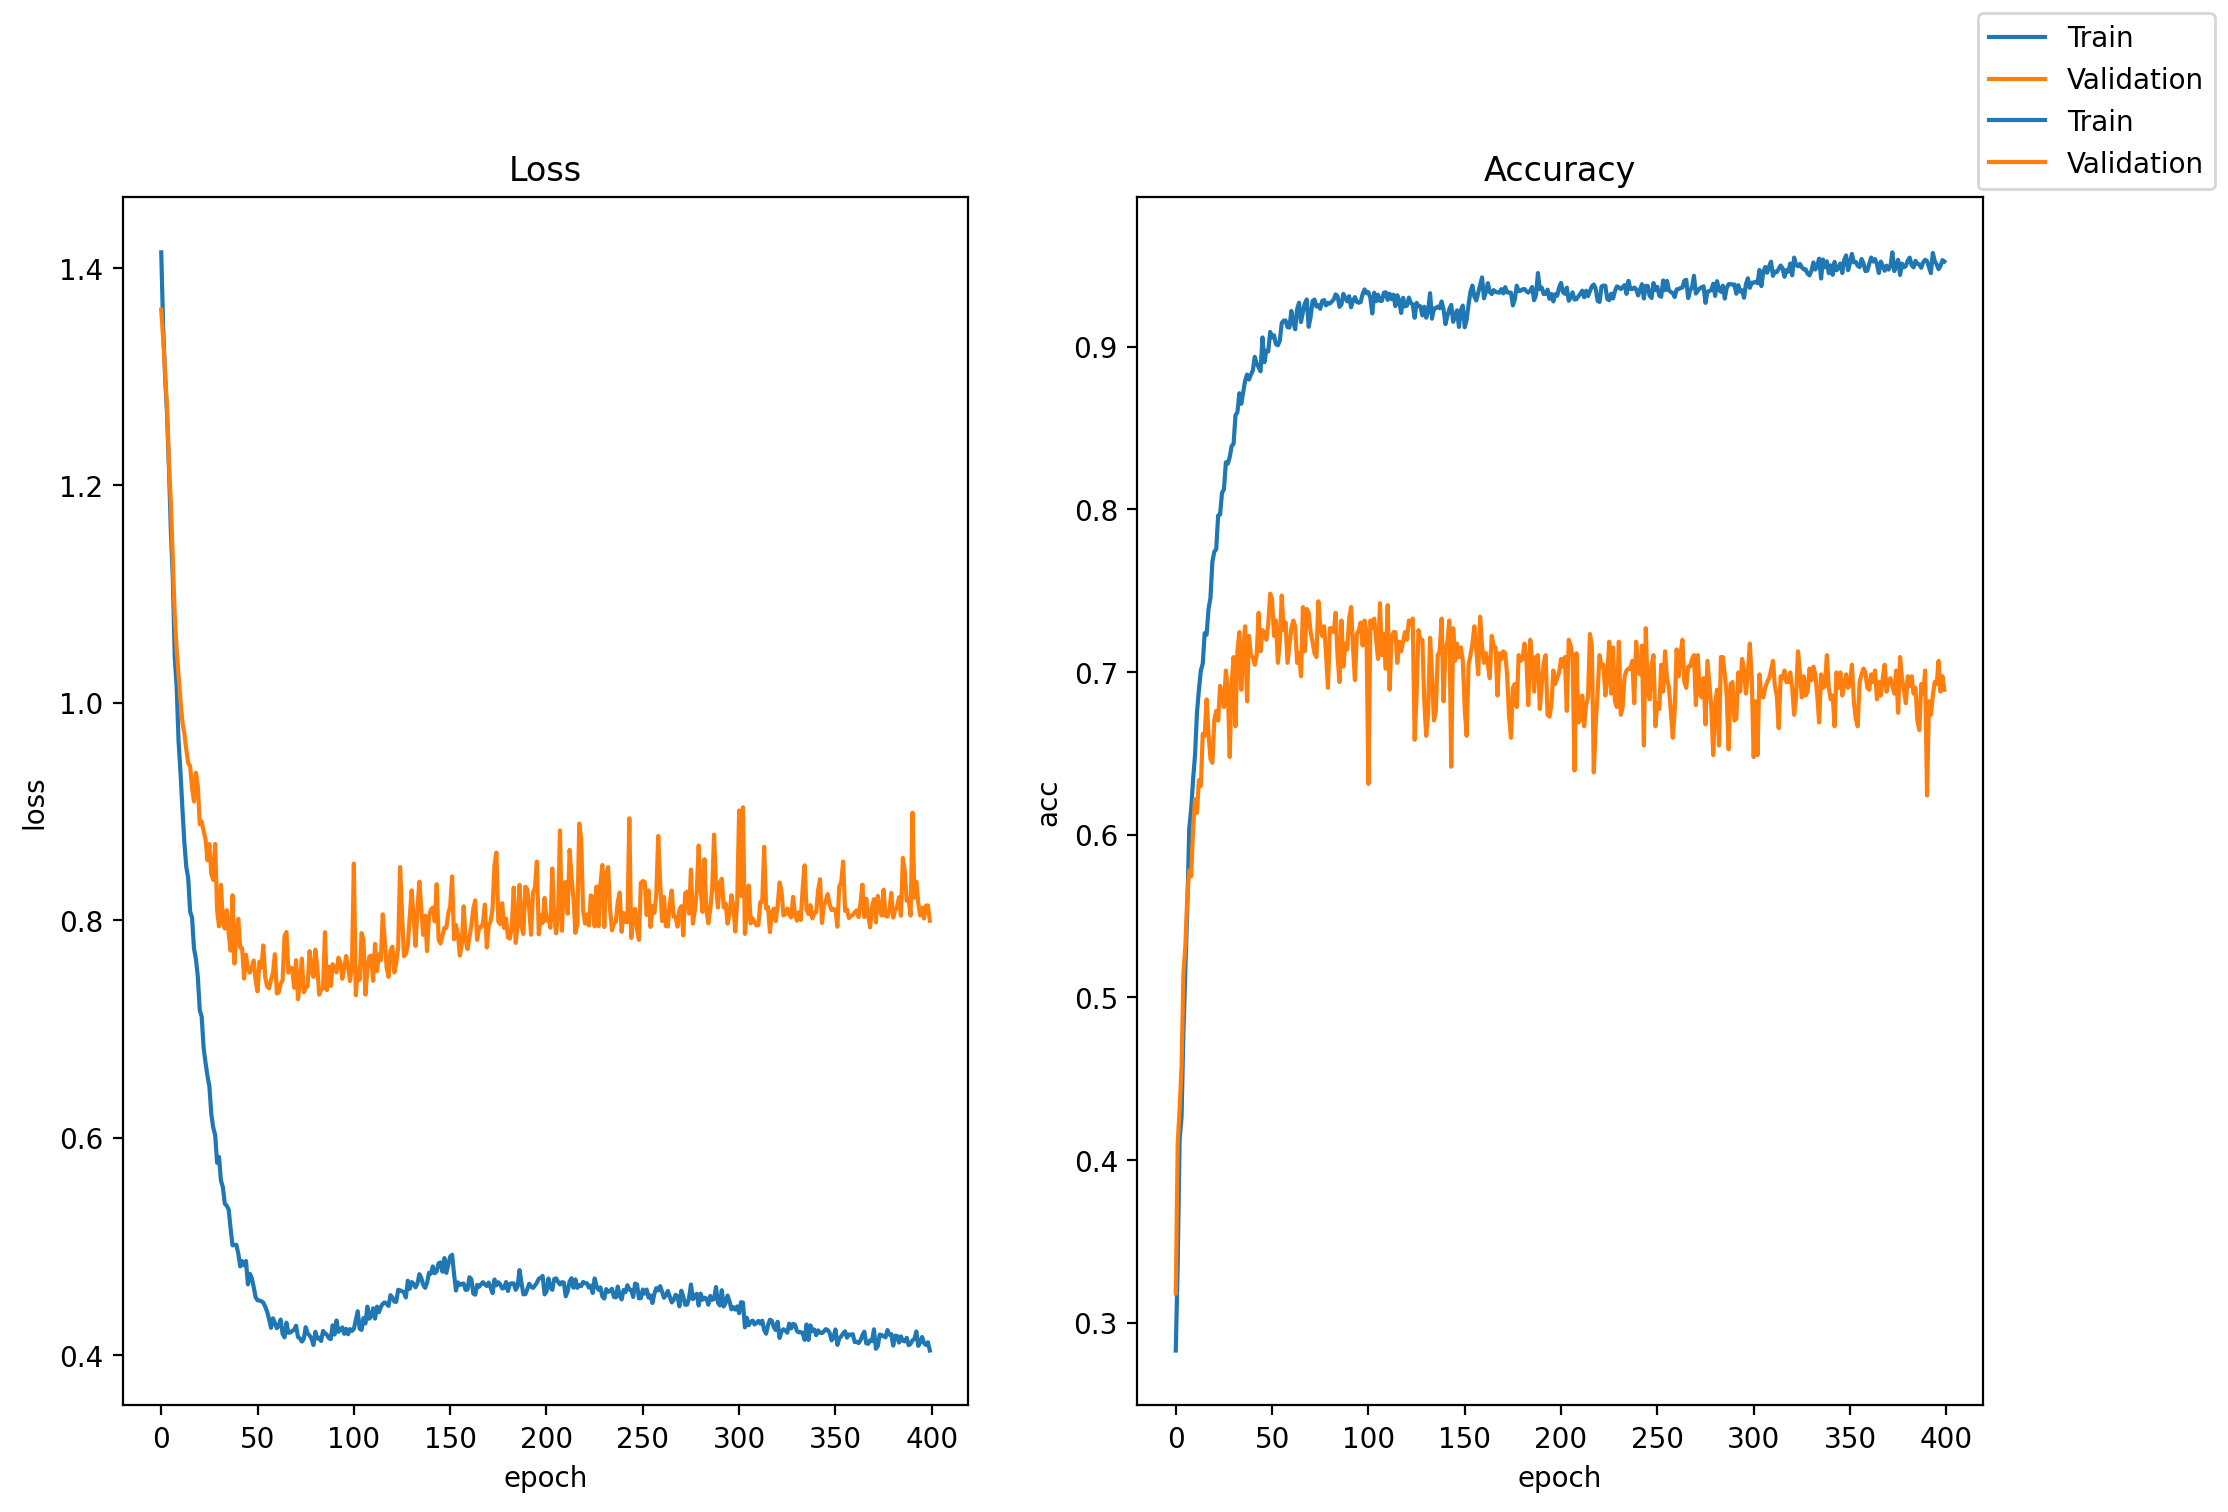

In [126]:
encoder_opt = {
    'conv1_size': 5,
    'conv1_out_channel': 22,
    'conv2_size': 5,
    'conv2_out_channel': 44,
    'conv3_size': 5,
    'conv3_out_channel': 22,
    'conv1_pool':2,
    'conv2_pool':2,
    'conv3_pool':2,
    'activation': 'none',
    'pool_type': 'max'
    
}
decoder_opt={
    'drop_rate': 0.8, 
    'linear1_out': 64, 
    'activation': 'leaky_relu',
    'avg_pool_size':4
}


train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 150,
    'scheduler_factor': 0.5,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 400,
    'downsample_split': True,
}

model = EEGCNNv3(in_channels=22,
                input_size=(1,22,500),
                encoder_opt=encoder_opt,
                decoder_opt=decoder_opt).to('cuda')
summary(model.cuda(),(1,22,500))

logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_val_01_45_ds_dir,
        label_dir=y_train_valid_dsample_dir,
        preload_gpu=True)


### Tes for normalized data 

523917
68	0.548182	0.872347	0.856399	0.680851	
--Iter 49	0.570363
69	0.553622	0.857227	0.828273	0.696217	
--Iter 49	0.566790
70	0.540585	0.868304	0.848799	0.666667	
--Iter 49	0.476871
71	0.536625	0.870115	0.802938	0.729314	
--Iter 49	0.459739
72	0.547089	0.864303	0.842008	0.684397	
--Iter 49	0.568761
73	0.543902	0.867293	0.826111	0.698582	
--Iter 49	0.570178
74	0.546572	0.868556	0.801235	0.713948	
--Iter 49	0.627972
75	0.542535	0.870536	0.807708	0.726950	
--Iter 49	0.591182
76	0.545425	0.870746	0.805642	0.717494	
--Iter 49	0.496209
77	0.540286	0.864597	0.823916	0.708038	
--Iter 49	0.503931
78	0.548328	0.873315	0.850749	0.682033	
--Iter 49	0.548238
79	0.537269	0.868388	0.800511	0.719858	
--Iter 49	0.507618
80	0.537221	0.877022	0.817649	0.721040	
--Iter 49	0.567959
81	0.534285	0.873905	0.818362	0.698582	
--Iter 49	0.551361
82	0.533160	0.877358	0.834845	0.711584	
--Iter 49	0.571864
83	0.530377	0.865903	0.809497	0.716312	
--Iter 49	0.542257
84	0.533723	0.872684	0.803220	0.715130	
--Iter 49

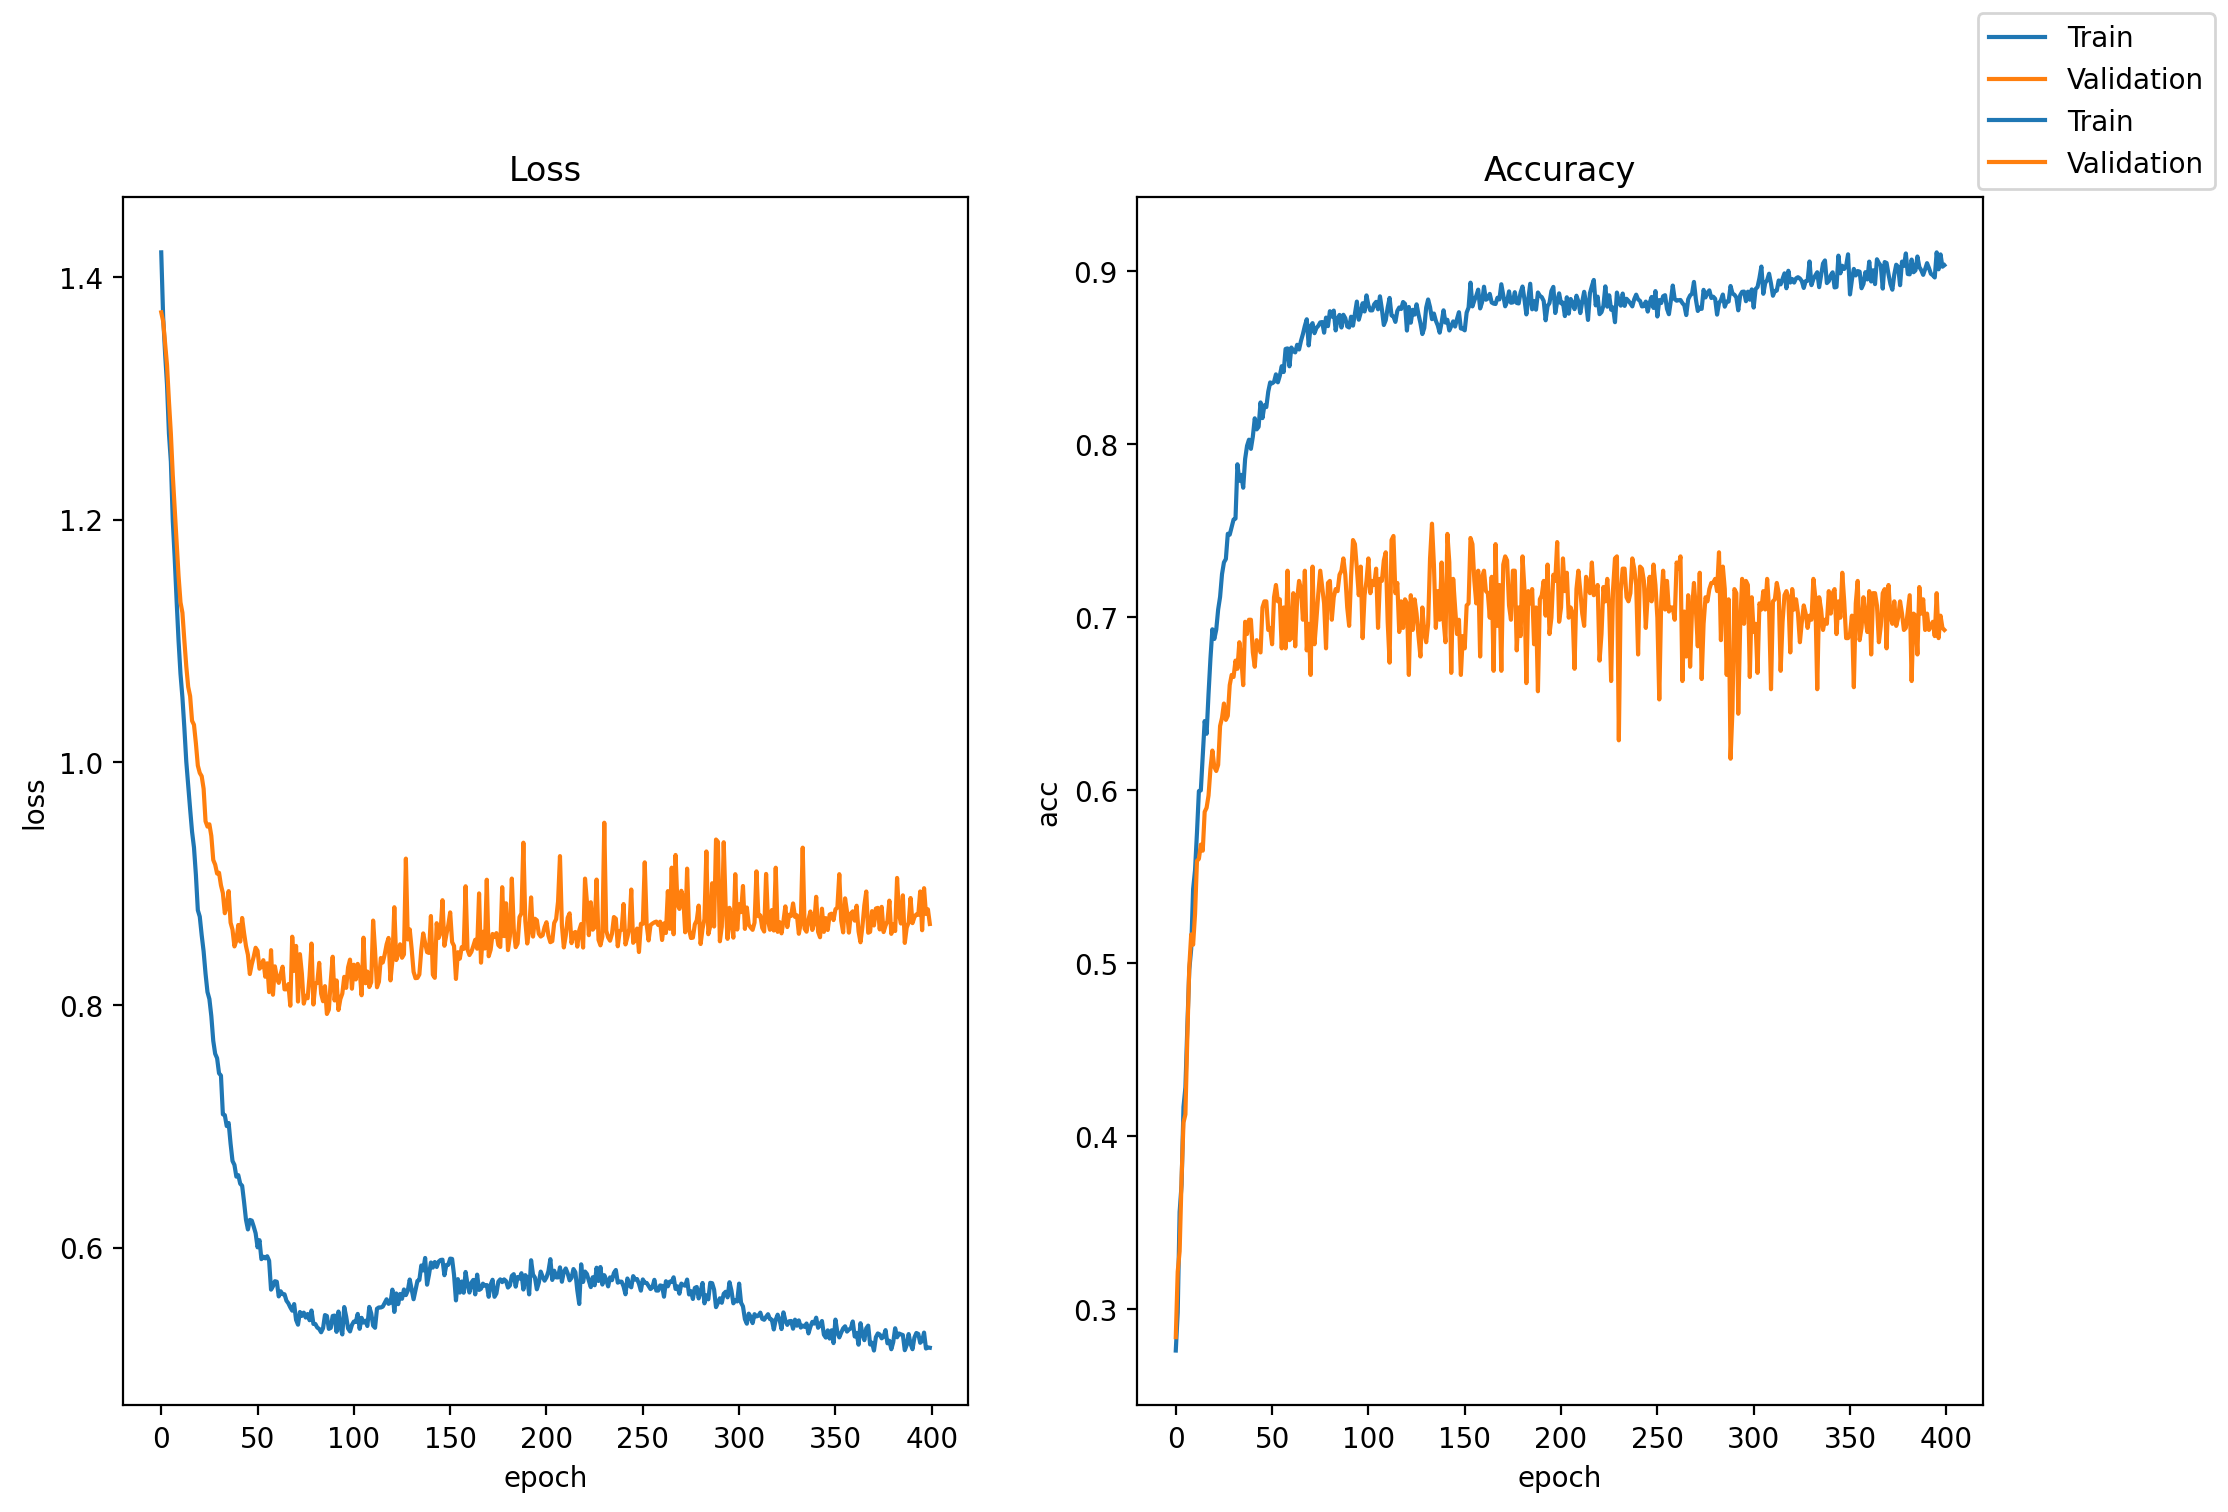

In [7]:
encoder_opt = {
    'conv1_size': 5,
    'conv1_out_channel': 22,
    'conv2_size': 5,
    'conv2_out_channel': 44,
    'conv3_size': 5,
    'conv3_out_channel': 22,
    'conv1_pool':2,
    'conv2_pool':2,
    'conv3_pool':2,
    'activation': 'none',
    'pool_type': 'max'
    
}
decoder_opt={
    'drop_rate': 0.8, 
    'linear1_out': 64, 
    'activation': 'leaky_relu',
    'avg_pool_size':4
}


train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 150,
    'scheduler_factor': 0.5,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 400,
    'downsample_split': True,
}

model = EEGCNNv3(in_channels=22,
                input_size=(1,22,500),
                encoder_opt=encoder_opt,
                decoder_opt=decoder_opt).to('cuda')
summary(model.cuda(),(1,22,500))
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_valid_ds_01_45_norm_dir,
        label_dir=y_train_valid_dsample_dir,
        preload_gpu=True)

## Use fft pahse 


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
        Conv2dAuto-1           [-1, 22, 1, 500]           2,420
       BatchNorm2d-2           [-1, 22, 1, 500]              44
         MaxPool2d-3           [-1, 22, 1, 250]               0
          Identity-4           [-1, 22, 1, 250]               0
        Conv2dAuto-5           [-1, 44, 1, 250]           4,840
       BatchNorm2d-6           [-1, 44, 1, 250]              88
         MaxPool2d-7           [-1, 44, 1, 125]               0
          Identity-8           [-1, 44, 1, 125]               0
        Conv2dAuto-9           [-1, 22, 1, 125]           4,840
      BatchNorm2d-10           [-1, 22, 1, 125]              44
        MaxPool2d-11            [-1, 22, 1, 62]               0
         Identity-12            [-1, 22, 1, 62]               0
  EEGCNNv3Encoder-13                 [-1, 1364]               0
           Linear-14                   

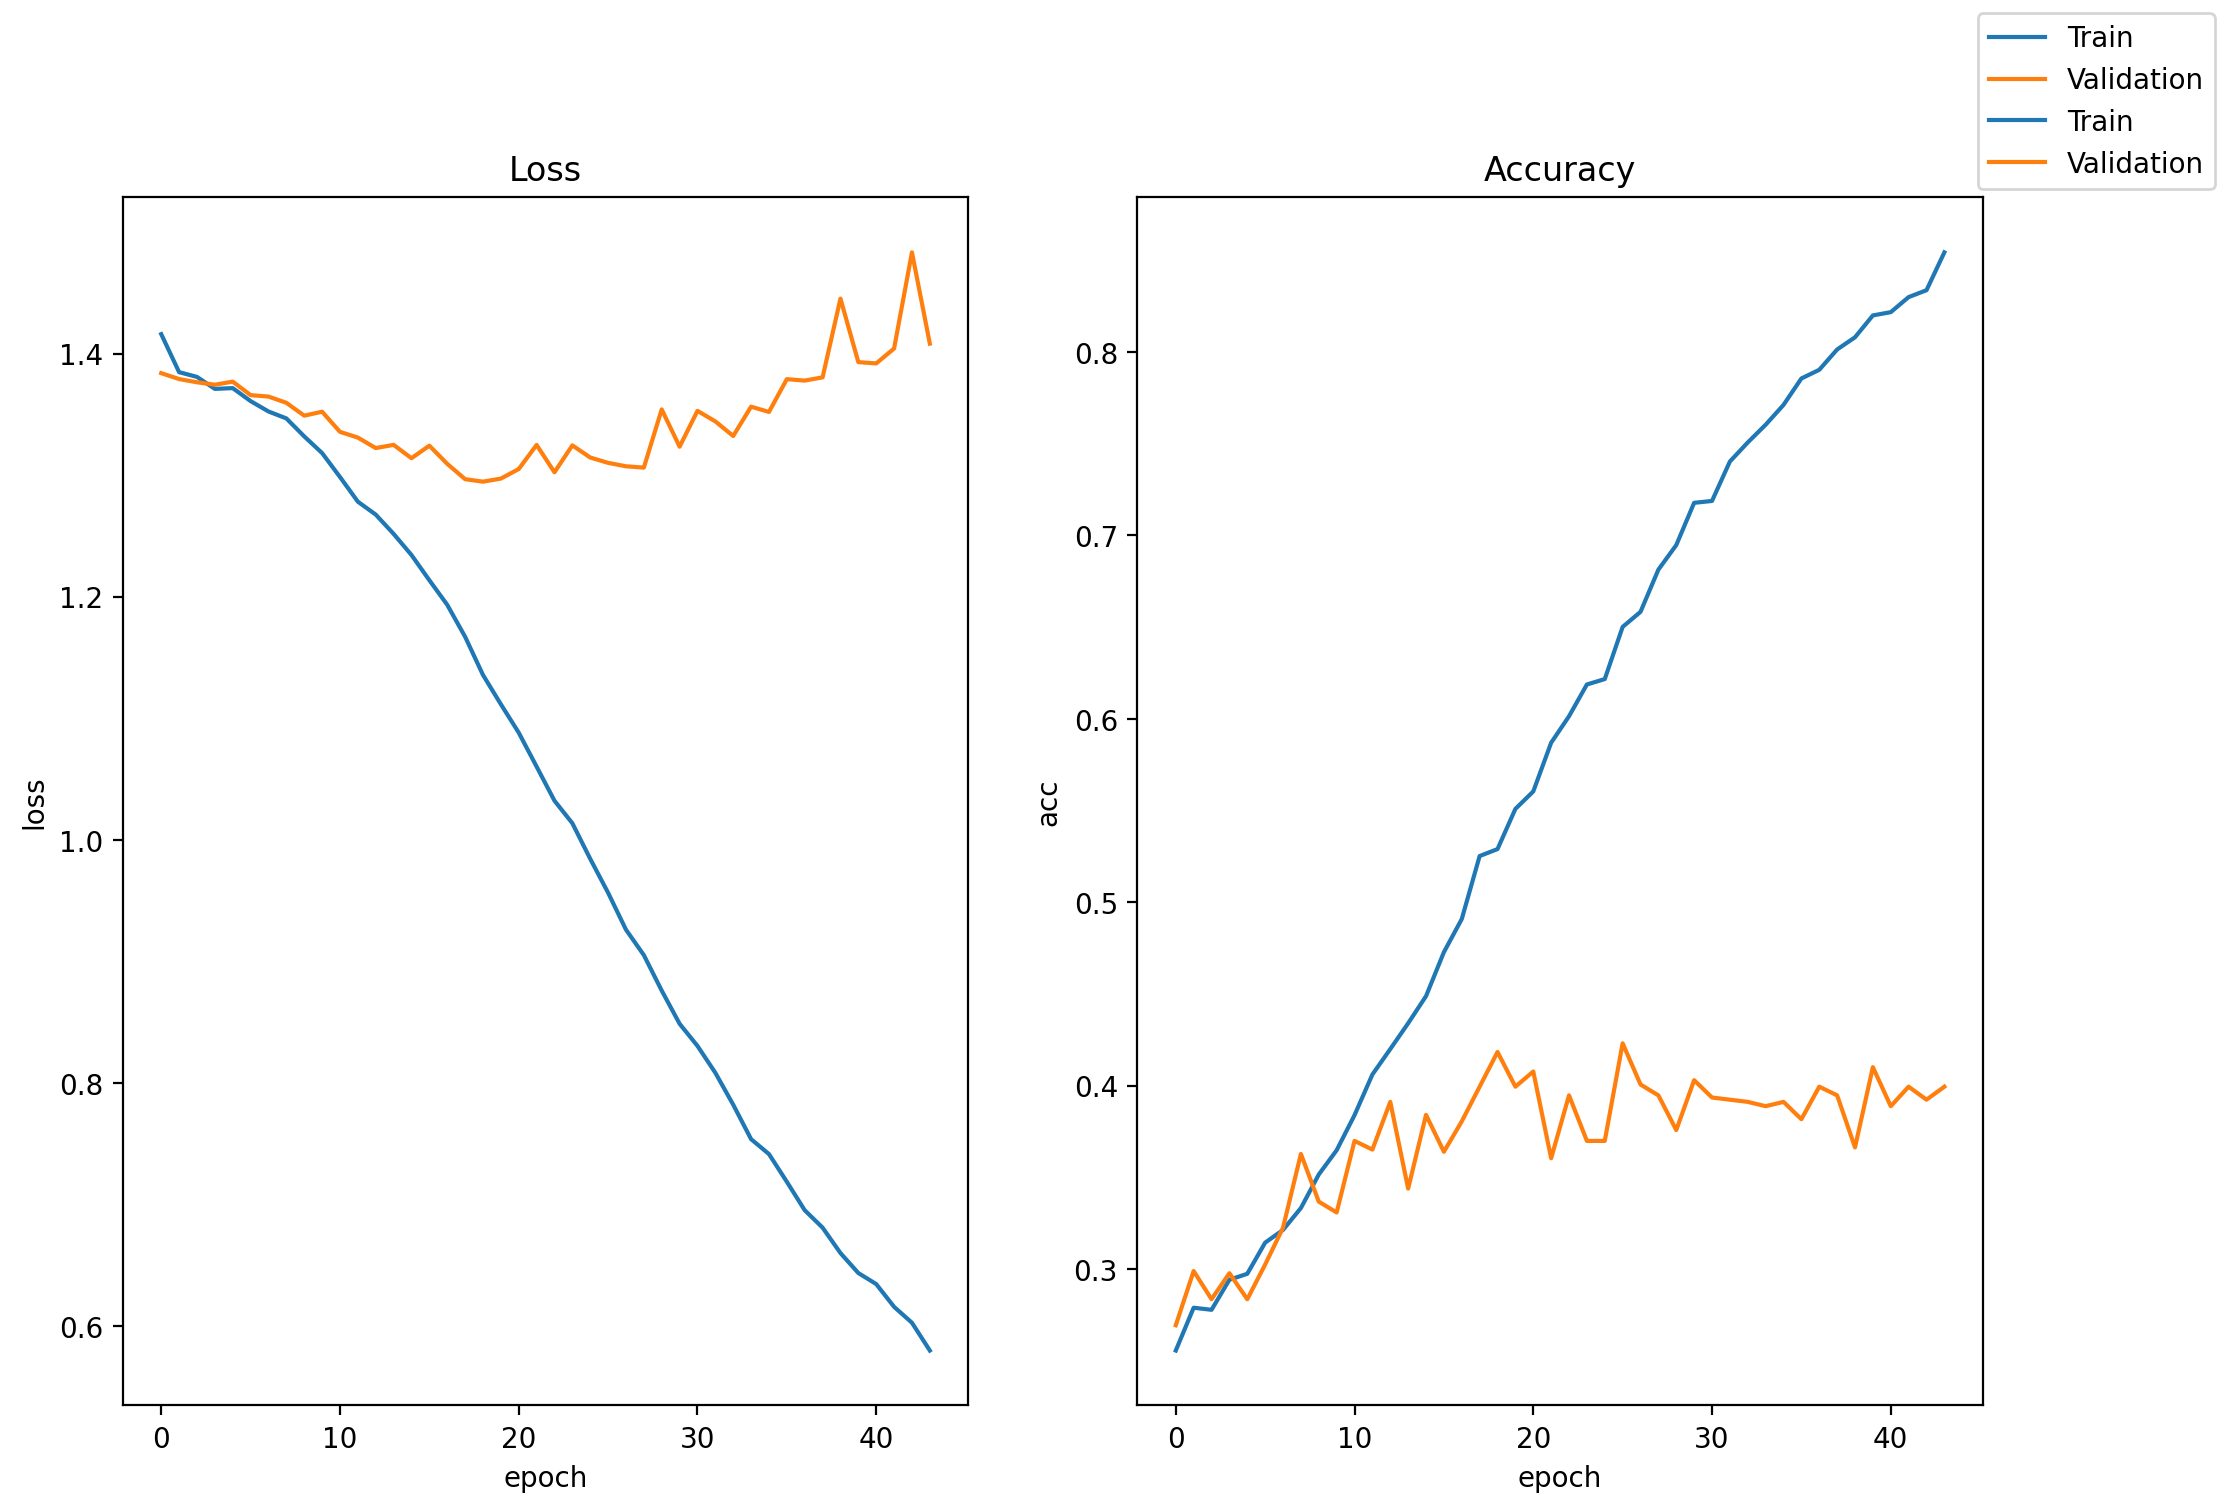

In [7]:
encoder_opt = {
    'conv1_size': 5,
    'conv1_out_channel': 22,
    'conv2_size': 5,
    'conv2_out_channel': 44,
    'conv3_size': 5,
    'conv3_out_channel': 22,
    'conv1_pool':2,
    'conv2_pool':2,
    'conv3_pool':2,
    'activation': 'none',
    'pool_type': 'max'
    
}
decoder_opt={
    'drop_rate': 0.8, 
    'linear1_out': 64, 
    'activation': 'leaky_relu',
    'avg_pool_size':4
}


train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 150,
    'scheduler_factor': 0.5,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 100,
    'downsample_split': True,
}

model = EEGCNNv3(in_channels=22,
                input_size=(1,22,500),
                encoder_opt=encoder_opt,
                decoder_opt=decoder_opt).to('cuda')
summary(model.cuda(),(1,22,500))
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_valid_ds_fftphase_dir,
        label_dir=y_train_valid_dsample_dir,
        preload_gpu=True)

066537
68	1.019142	0.806730	1.120618	0.647754	
--Iter 49	1.021465
69	1.016266	0.812289	1.115307	0.667849	
--Iter 49	1.095187
70	1.015955	0.810184	1.121654	0.663121	
--Iter 49	0.967794
71	1.014857	0.811489	1.116726	0.666667	
--Iter 49	1.010344
72	1.019841	0.801339	1.144489	0.621749	
--Iter 49	1.066297
73	1.020435	0.801171	1.108647	0.679669	
--Iter 49	1.013123
74	1.015572	0.808878	1.123836	0.637116	
--Iter 49	0.947153
75	1.022366	0.797423	1.126202	0.635934	
--Iter 49	0.999431
76	1.016967	0.808162	1.109952	0.676123	
--Iter 49	1.038587
77	1.019762	0.802097	1.113089	0.670213	
--Iter 49	1.030248
78	1.008525	0.814016	1.122584	0.648936	
--Iter 49	1.042414
79	1.017014	0.805298	1.108775	0.676123	
--Iter 49	1.007188
80	1.012484	0.812542	1.111908	0.665485	
--Iter 49	1.019740
81	1.008591	0.820039	1.120123	0.646572	
--Iter 49	0.999676
82	1.014329	0.806941	1.115808	0.660757	
--Iter 49	1.019122
83	1.011730	0.814943	1.108780	0.680851	
--Iter 49	0.957378
84	1.014246	0.811826	1.108380	0.682033	
--Iter 49

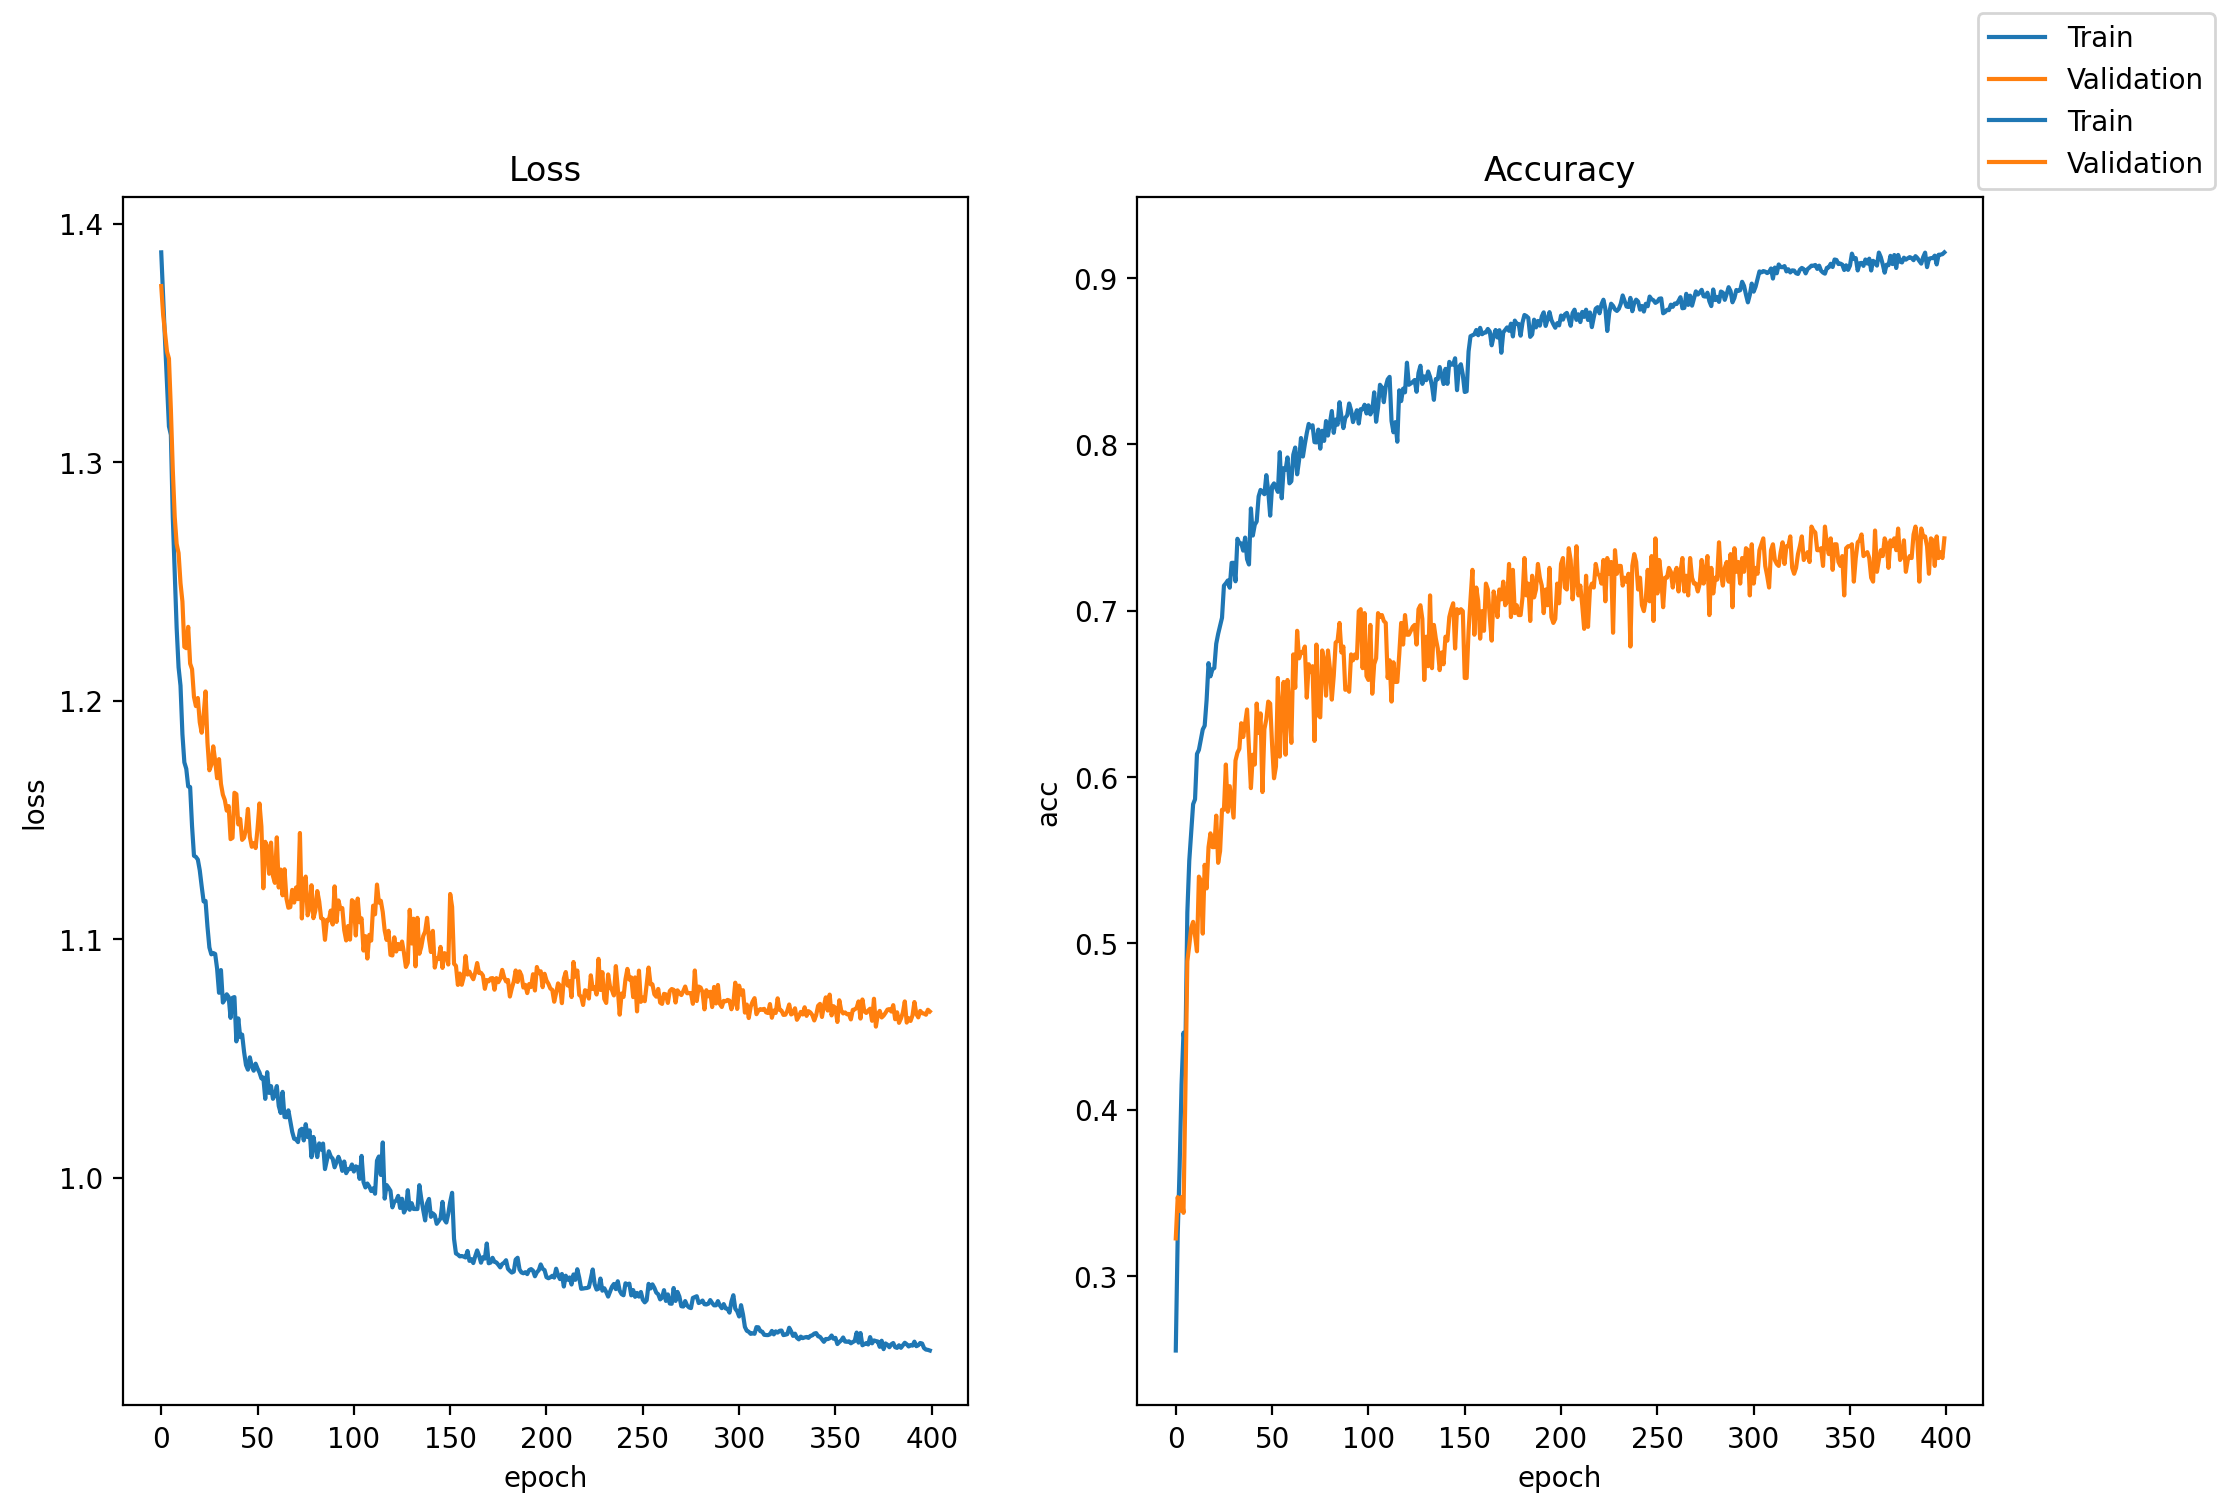

In [127]:

model = ShallowConv2(in_channels=1,classes=4).to('cuda')
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_val_01_45_ds_dir,
        label_dir=y_train_valid_dsample_dir,
        preload_gpu=True)